<a href="https://colab.research.google.com/github/spiyer99/Fury-of-Dracula/blob/master/Buntworthy_StyleGAN_ADA_blending_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network blending in StyleGAN-ADA

Swapping layers between two models in StyleGAN gives some interesting results. You need a base model and a second model which has been fine-tuned from the base.

In [ ]:
%cd /content/
!git clone https://github.com/justinpinkney/stylegan2.git

In [ ]:
%cd stylegan2

In [ ]:
%tensorflow_version 1.x
!pip install typer

Command line help for the blending function is below. Make sure that you specify either `--output-grid` to save an example image or `--output-pkl` to save the modified pkl. (Currently only the the Gs network is modified)

- low_res_pkl: Path, # Pickle file from which to take low res layers
- high_res_pkl: Path, # Pickle file from which to take high res layers
- resolution: int, # Resolution level at which to switch between models
- level: int  = 0, # Switch at Conv block 0 or 1?
- blend_width: Optional[float] = None, # None = hard switch, float = smooth switch (logistic) with given width
- output_grid: Optional[Path] = "blended.jpg", # Path of image file to save example grid (None = don't save)
- seed: int = 0, # seed for random grid
- output_pkl: Optional[Path] = None, # Output path of pickle (None = don't save)
- verbose: bool = False, # Print out the exact blending fraction

         

Use as an example a model I fine-tuned at 256 from FFHQ to data scraped from NASA DSCOVR:EPIC satellite (https://epic.gsfc.nasa.gov/).

For the output of the fine-tuned model see the tweet below (https://twitter.com/Buntworthy/status/1295445259971899393)

I'm actually going to use a model from earlier in training than the result shown in the tweet, this makes the blending a bit nicer.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf

%cd /content/
!git clone https://github.com/NVlabs/stylegan2-ada.git
%cd stylegan2-ada

!nvcc test_nvcc.cu -o test_nvcc -run

print('Tensorflow version: {}'.format(tf.__version__) )
!nvidia-smi -L
print('GPU Identified at: {}'.format(tf.test.gpu_device_name()))

In [ ]:
!cp /content/stylegan2/blend_models.py /content/stylegan2-ada/
!cp /content/stylegan2/training/misc.py /content/stylegan2-ada/training/
!cp /content/stylegan2/grid_vid.py /content/stylegan2-ada/

In [ ]:
####
# Here you get your fine-tuned PKL and name it other.pkl

!wget 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/metfaces.pkl' -O other.pkl


In [ ]:
####
# Here you get your FFHQ PKL and name it ffhq.pkl

# !wget 'https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl' -O ffhq.pkl
# ffhq_url = "http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl"
# ffhq_url = "https://hanlab.mit.edu/projects/data-efficient-gans/models/stylegan2-ffhq.pkl"
ffhq_url = "https://drive.google.com/uc?id=1BUL-RIzXC7Bpnz2cn230CbA4eT7_Etp0"

FFHQ_MODEL = 'ffhq.pkl'
# !wget $ffhq_url -O $FFHQ_MODEL
!gdown $ffhq_url -O $FFHQ_MODEL

In [ ]:
import glob
from pathlib import Path

def select_items_from_list(l):
  return [l[len(l)//4], l[len(l)//2], l[3*len(l)//4], l[-2]]

def get_snapshot_number(file_path):
  return int(str(Path(file_path).stem).split('-')[-1])

RESULTS_ITERATION = 8
SNAPSHOTS_PATH = f'/content/drive/MyDrive/stylegan2/results{RESULTS_ITERATION}/*/network-snapshot-*.pkl'
SNAPSHOTS = glob.glob(SNAPSHOTS_PATH)
SNAPSHOTS = sorted(SNAPSHOTS, key = lambda x: get_snapshot_number(x))
# SNAPSHOTS = select_items_from_list(SNAPSHOTS)

# !gdown https://drive.google.com/uc?id=1_QysUKfed1-_x9e5off2WWJKp1yUcidu
# SNAPSHOTS = ['ukiyoe-256-slim-diffAug-002789.pkl']

SNAPSHOTS

In [ ]:
from IPython.display import Image 

In [ ]:
!mkdir -p "/content/drive/MyDrive/colab_data/blend"

Time to try out a bunch of different resolutions for the switch and display the results. Remember the earth model provides the low-resolution layers, i.e. the "structure", and the original faces model the high-resolution, i.e. the "texture"

I'm going to run the main function in blend_models.py in a python loop, but you can also run it from the command line, something like

`python blend_models.py epic-slim-256-000040.pkl stylegan2-ffhq.pkl 64 --output-grid "blended.jpg"`

Setting up TensorFlow plugin "fused_bias_act.cu": Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Compiling... Loading... Done.
blending network-snapshot-000020 at 64x64


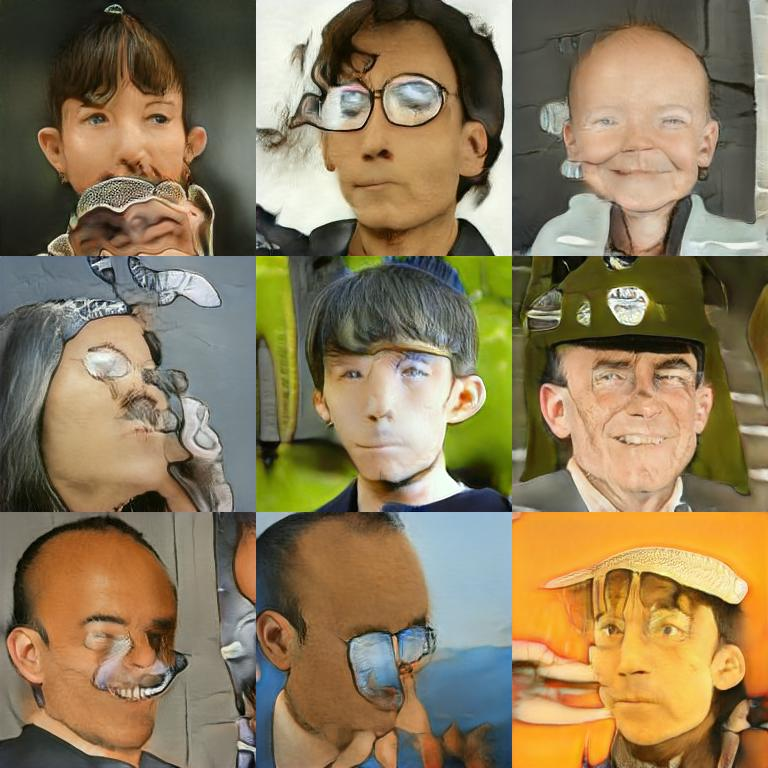

blending network-snapshot-000020 at 128x128


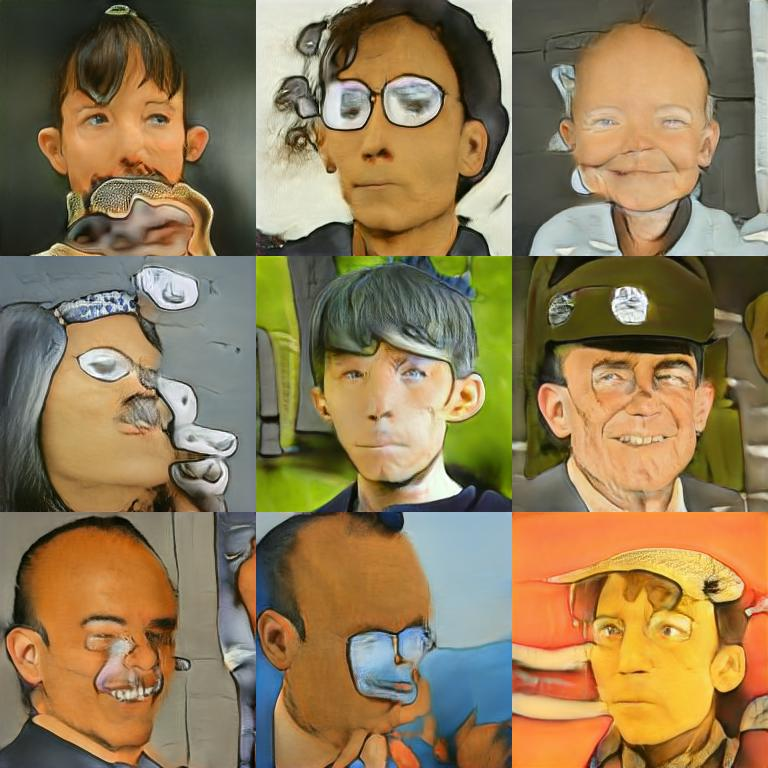

blending network-snapshot-000020 at 256x256


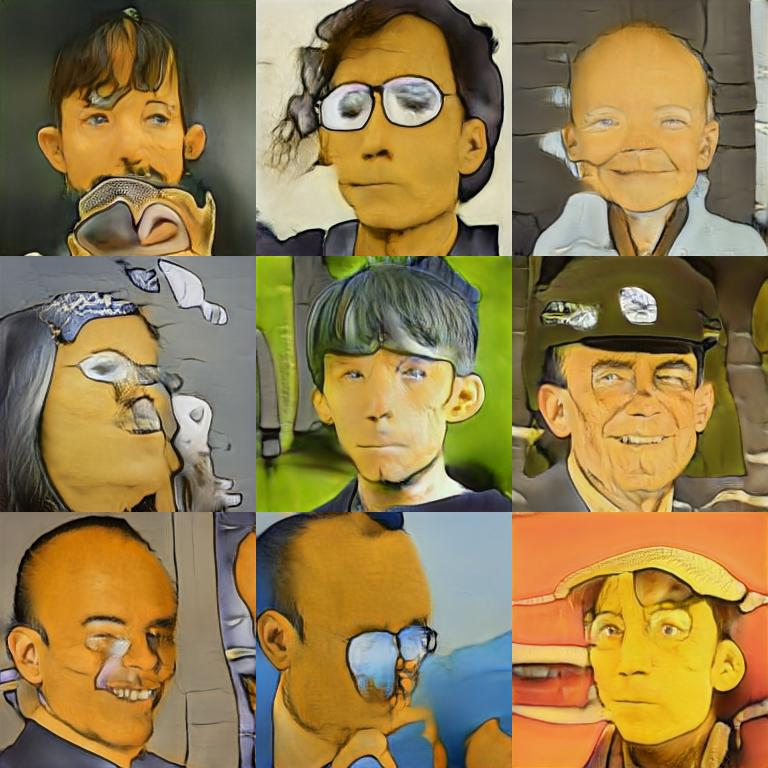

blending network-snapshot-000024 at 64x64


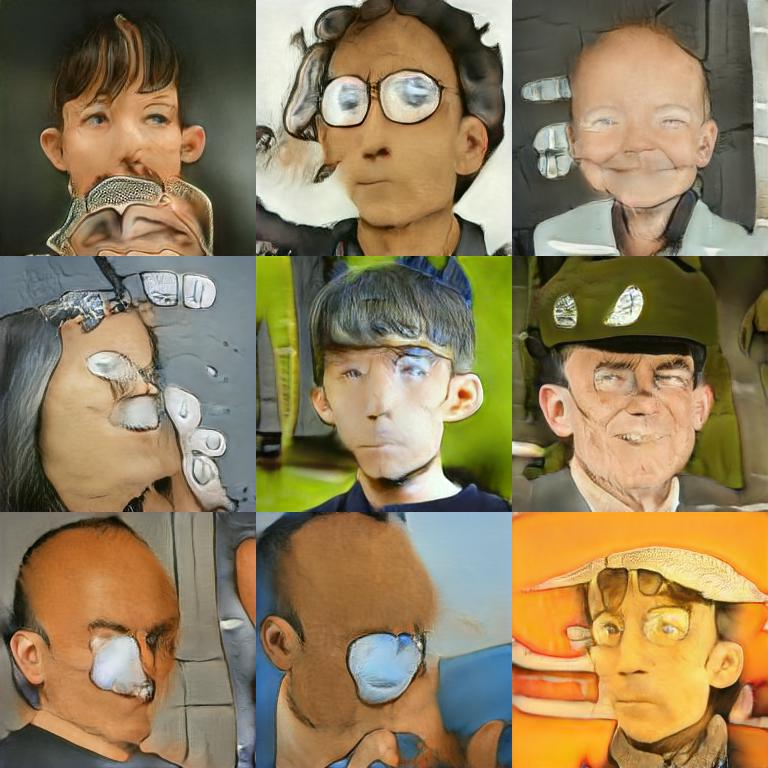

blending network-snapshot-000024 at 128x128


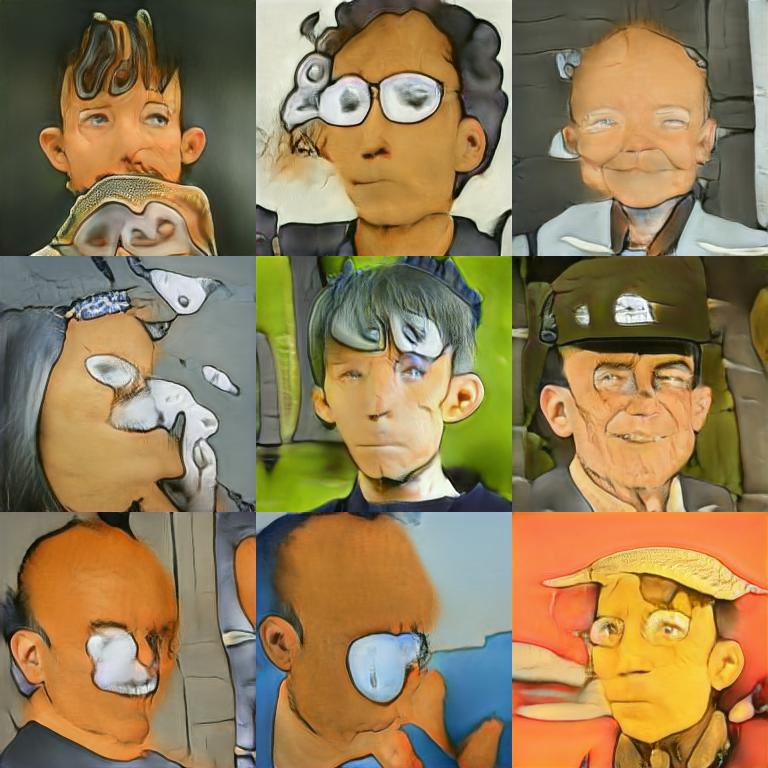

blending network-snapshot-000024 at 256x256


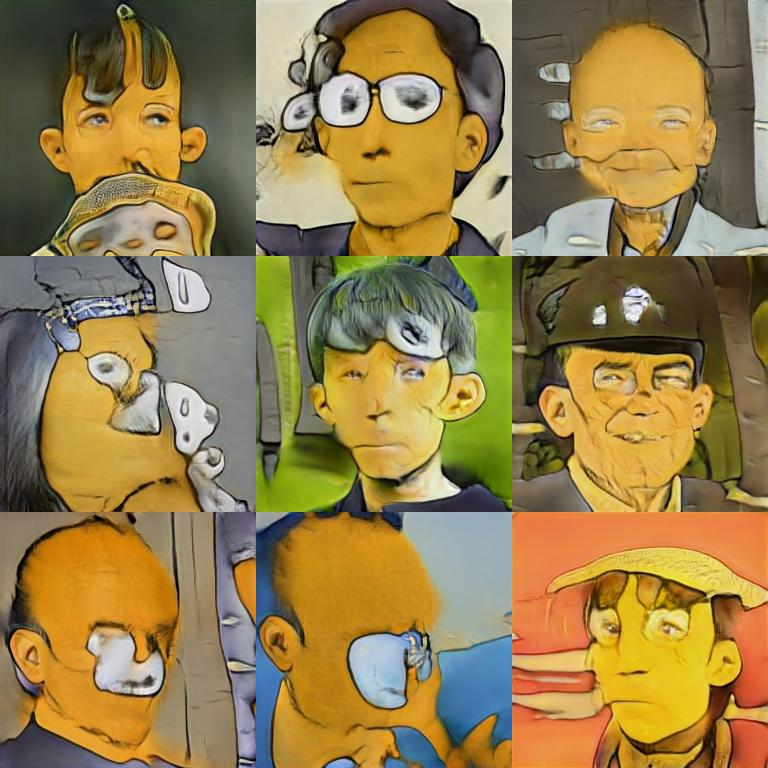

blending network-snapshot-000028 at 64x64


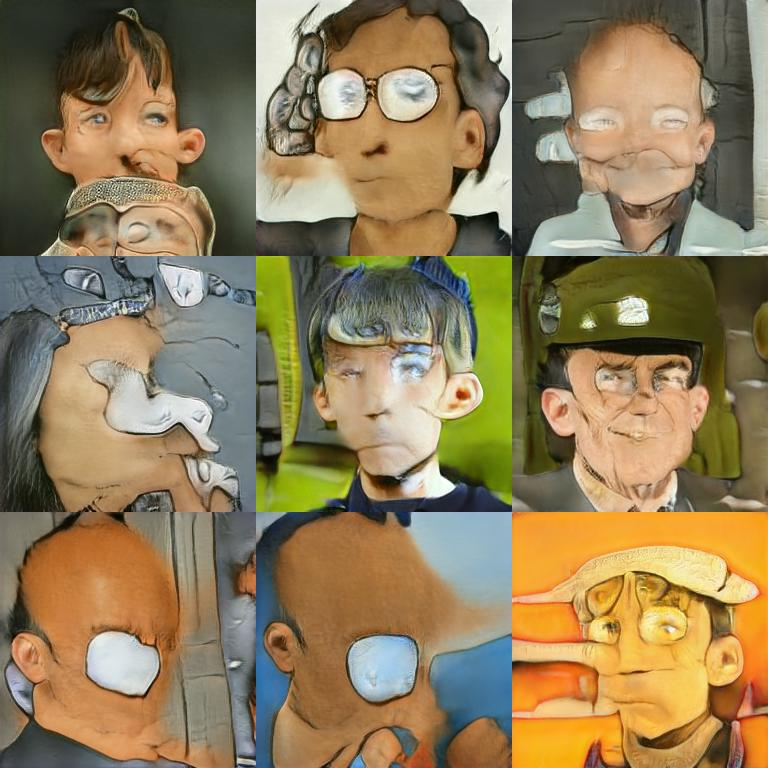

blending network-snapshot-000028 at 128x128


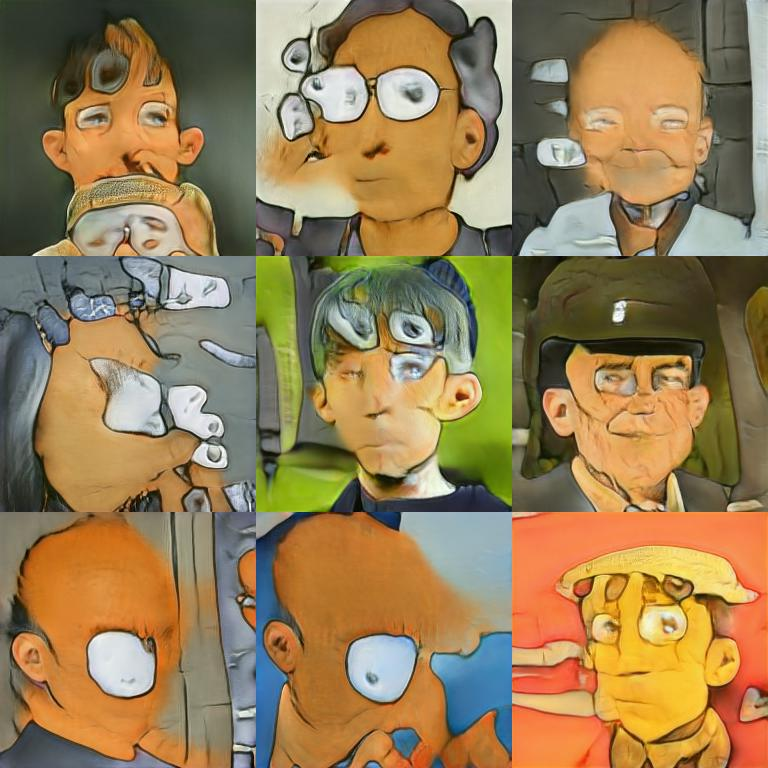

blending network-snapshot-000028 at 256x256


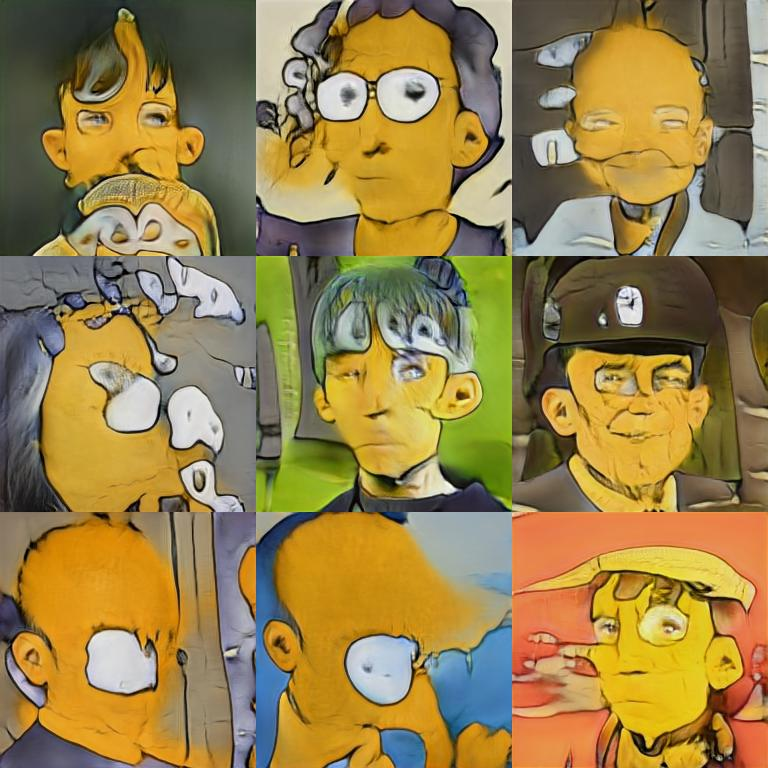

blending network-snapshot-000033 at 64x64


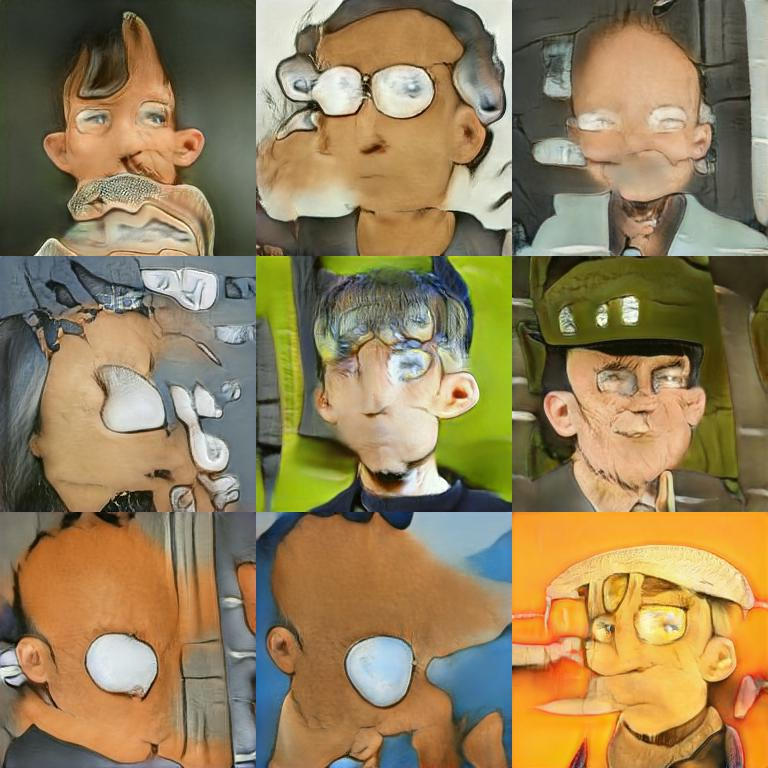

blending network-snapshot-000033 at 128x128


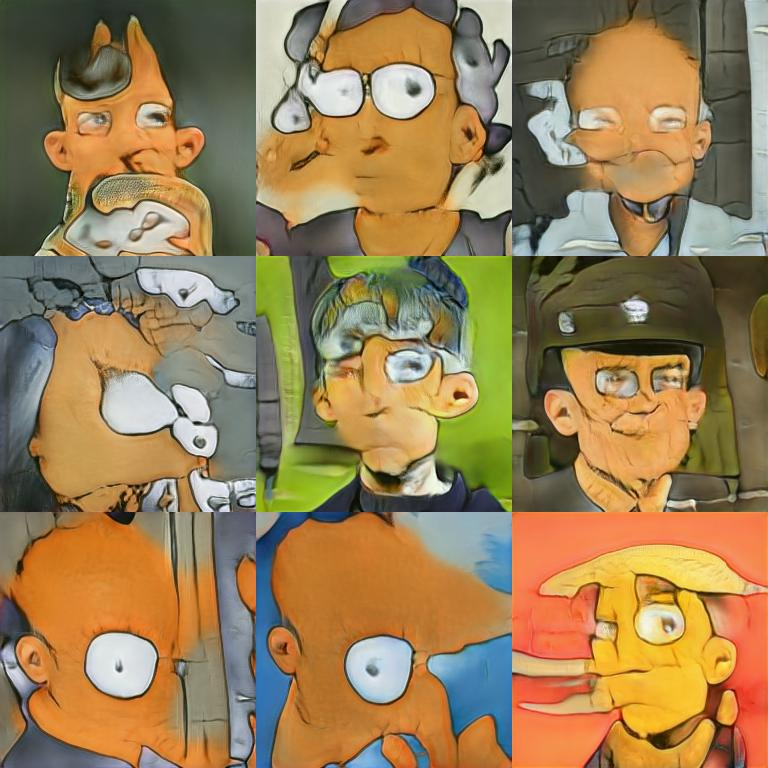

blending network-snapshot-000033 at 256x256


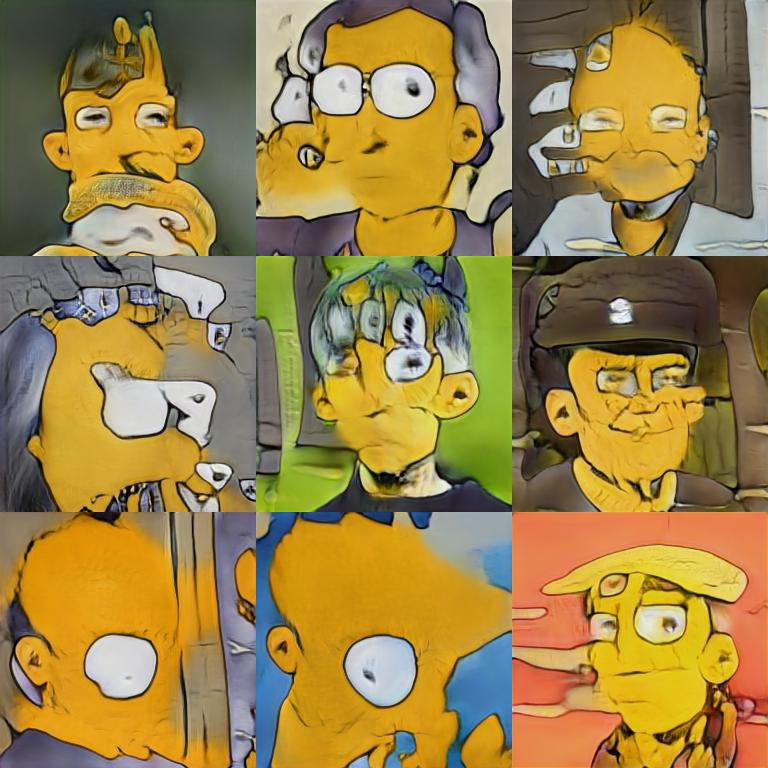

blending network-snapshot-000057 at 64x64


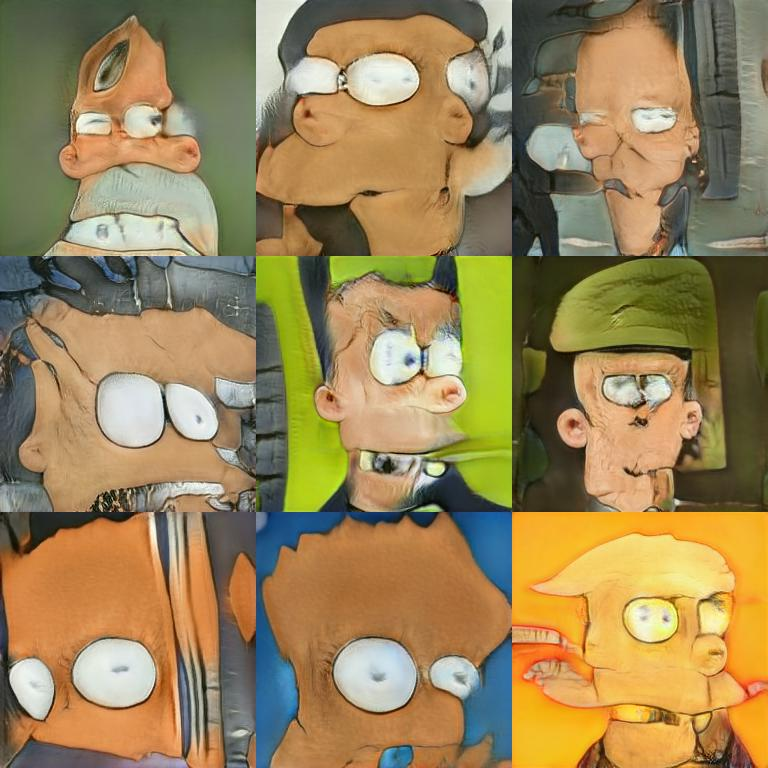

blending network-snapshot-000057 at 128x128


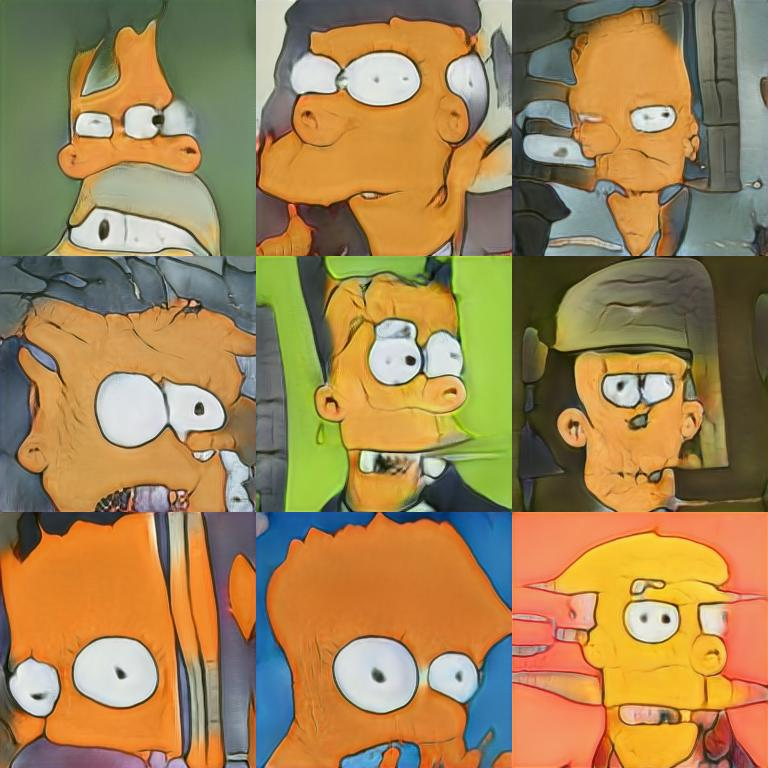

blending network-snapshot-000057 at 256x256


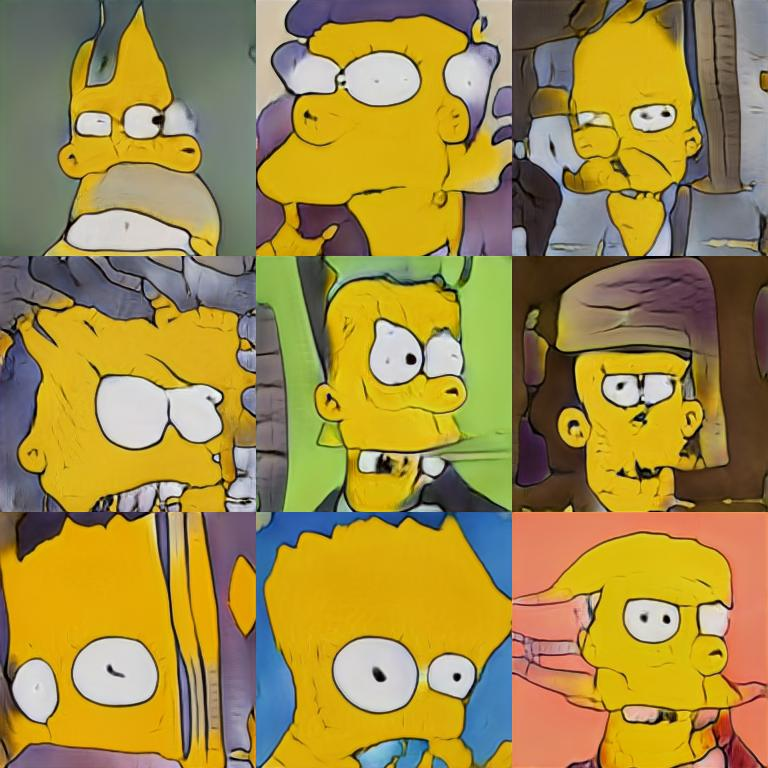

blending network-snapshot-000061 at 64x64


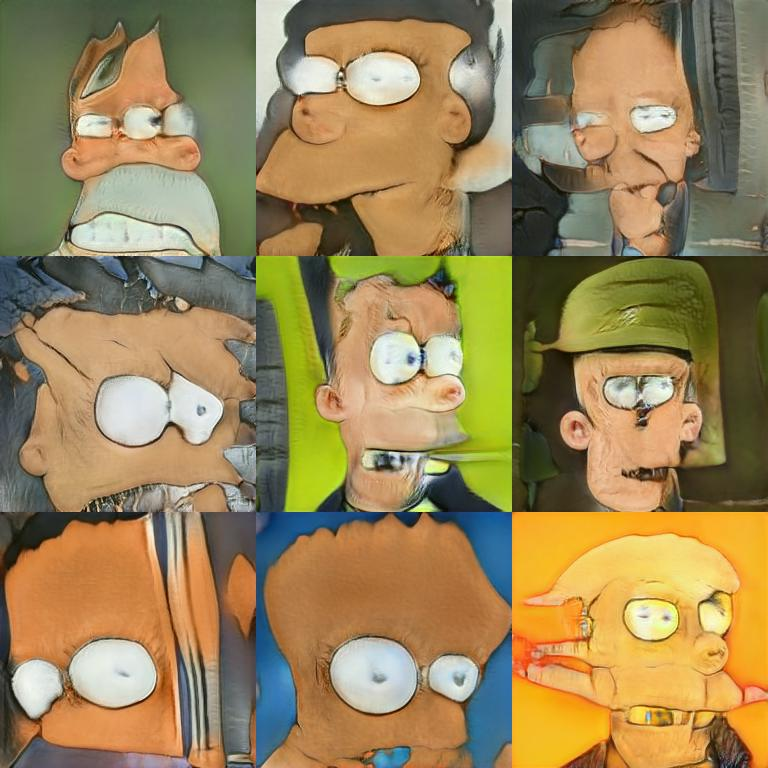

blending network-snapshot-000061 at 128x128


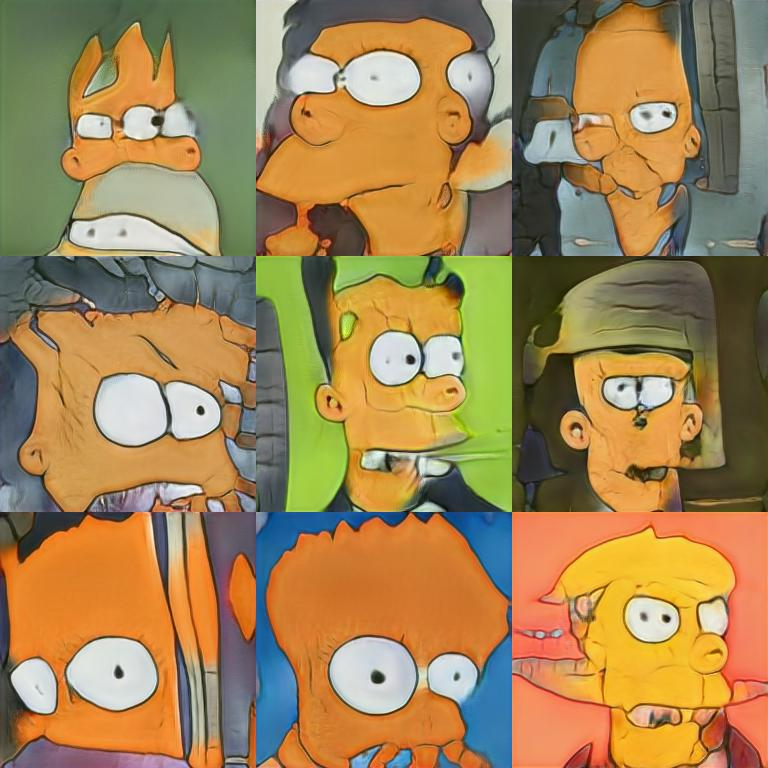

blending network-snapshot-000061 at 256x256


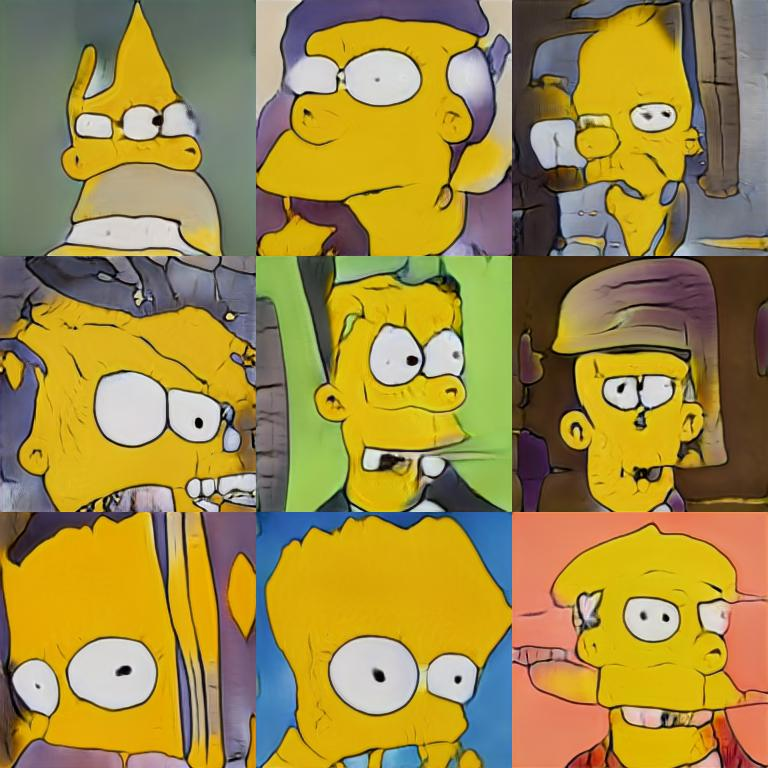

blending network-snapshot-000065 at 64x64


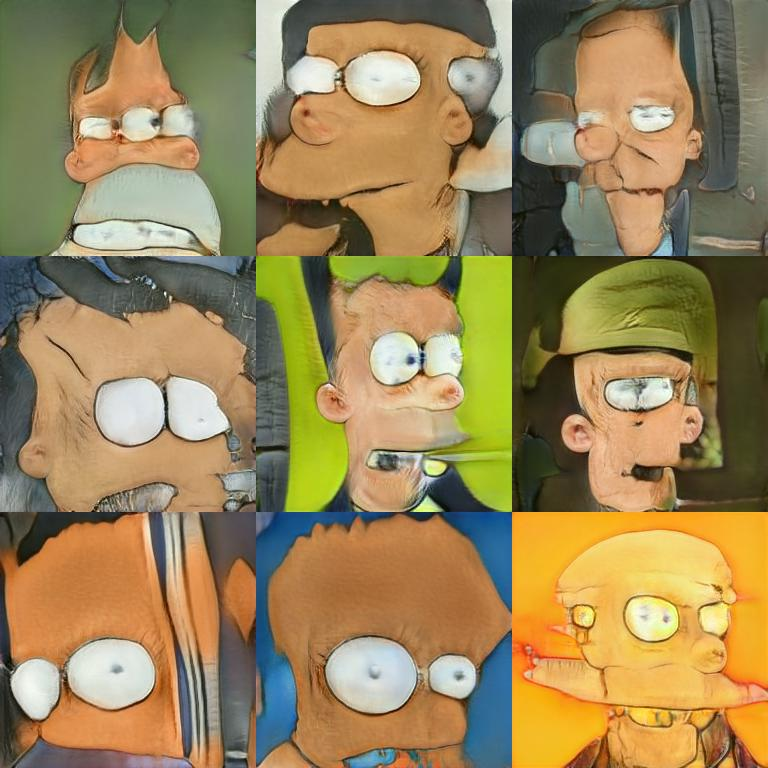

blending network-snapshot-000065 at 128x128


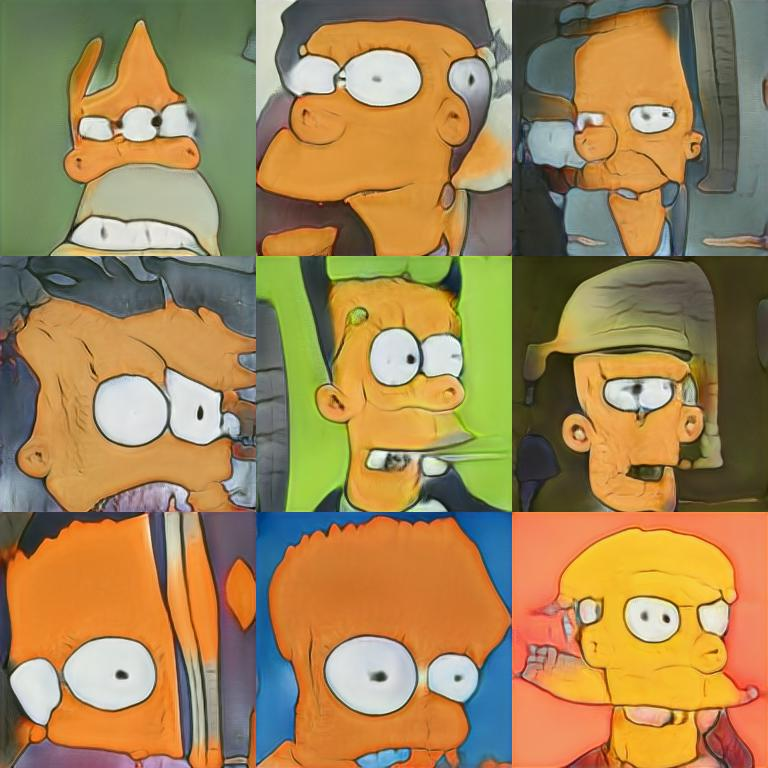

blending network-snapshot-000065 at 256x256


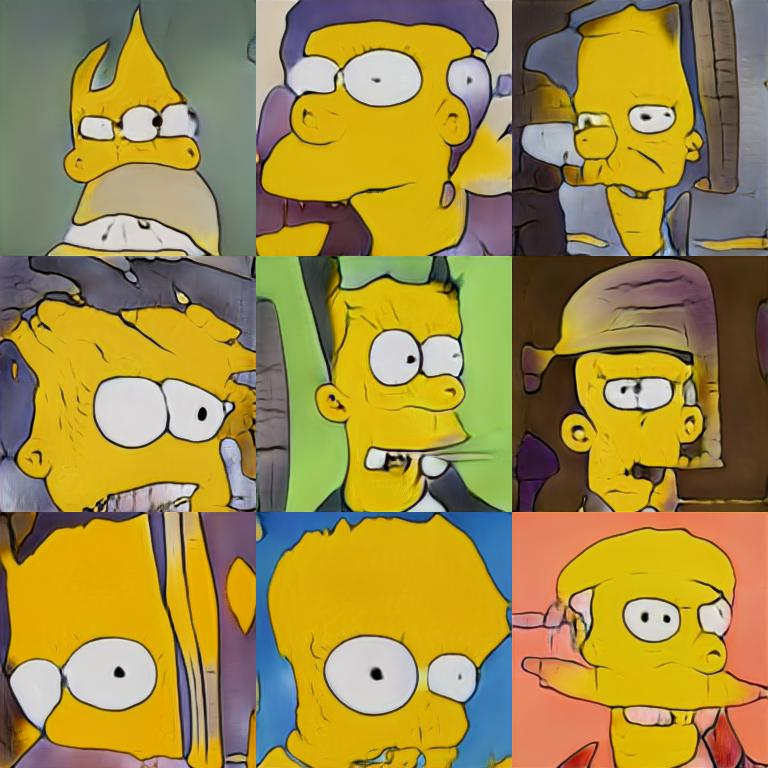

blending network-snapshot-000069 at 64x64


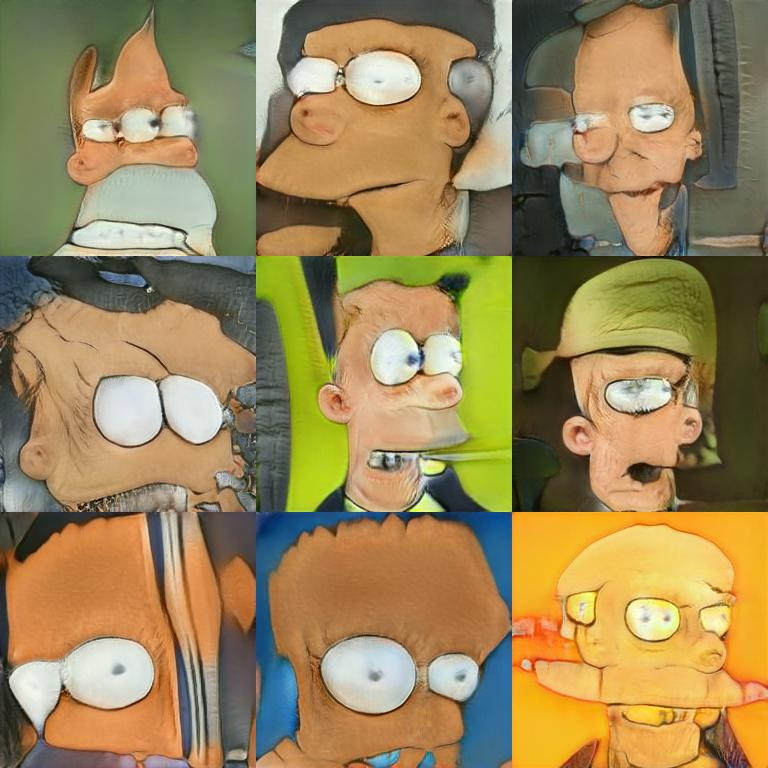

blending network-snapshot-000069 at 128x128


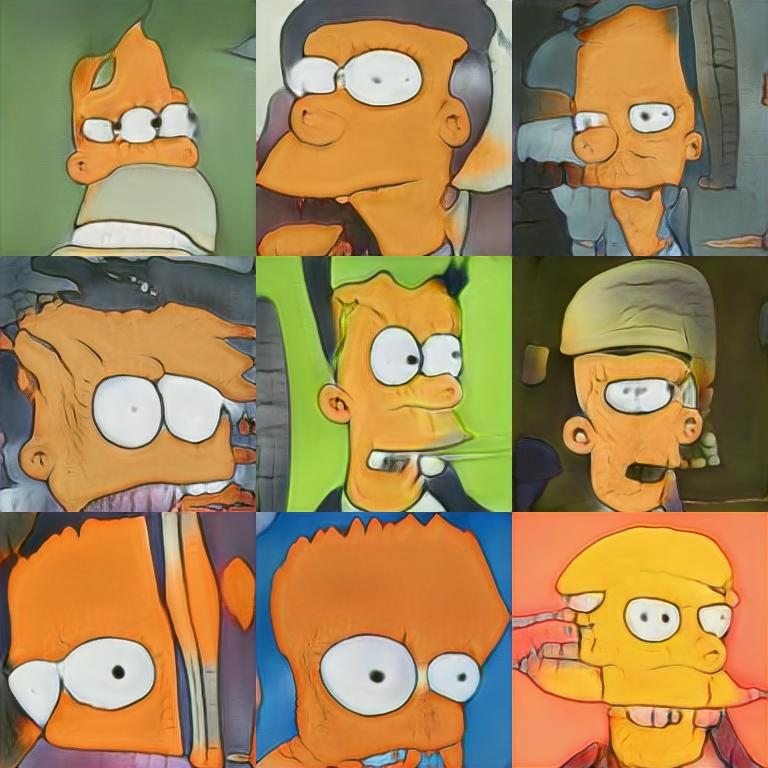

blending network-snapshot-000069 at 256x256


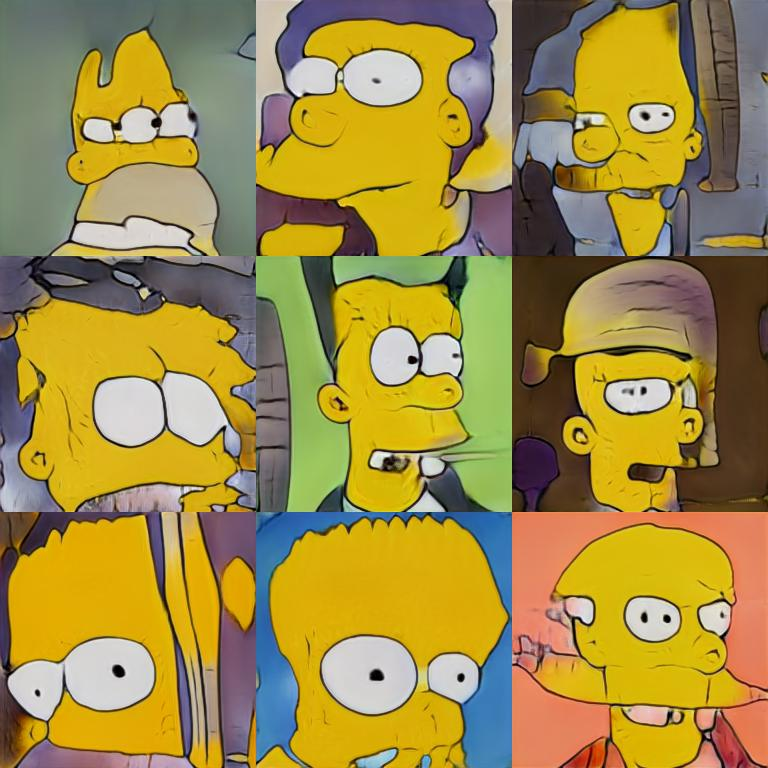

blending network-snapshot-000073 at 64x64


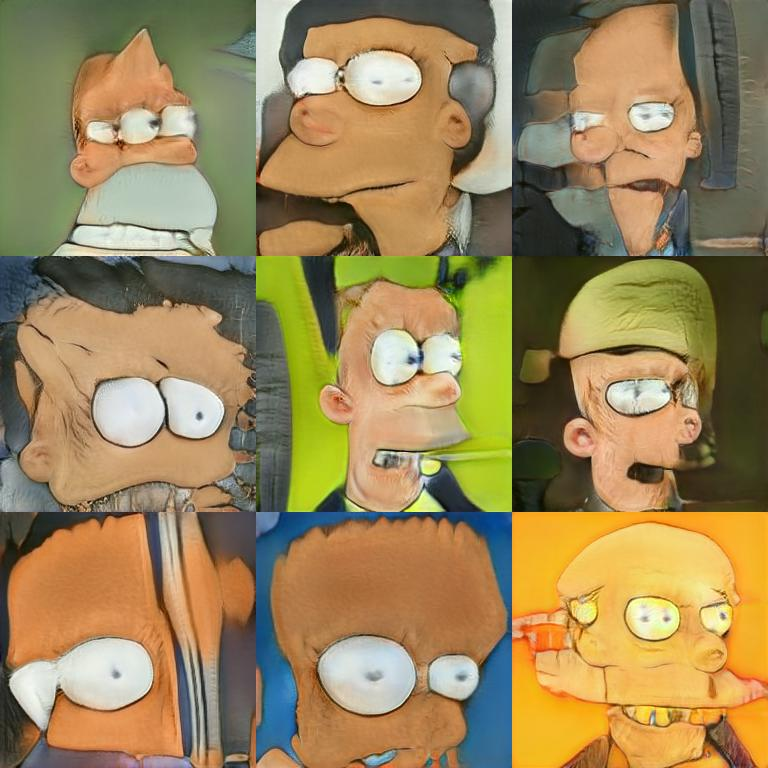

blending network-snapshot-000073 at 128x128


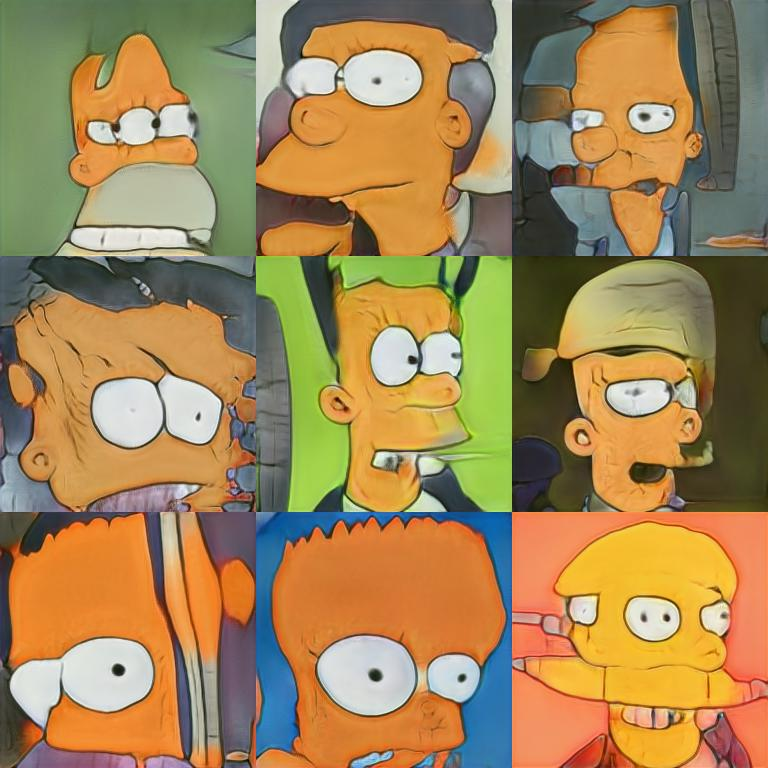

blending network-snapshot-000073 at 256x256


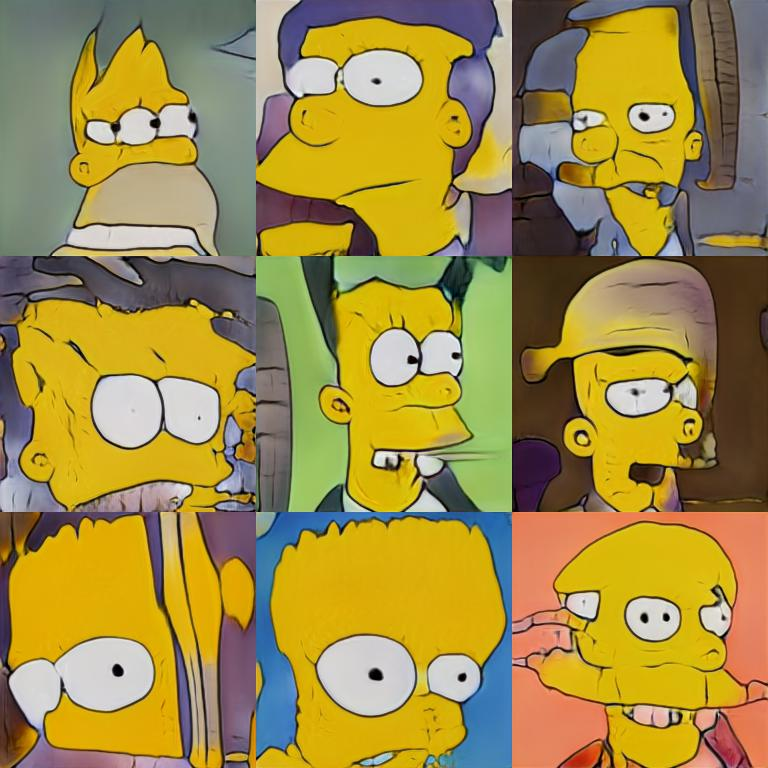

blending network-snapshot-000078 at 64x64


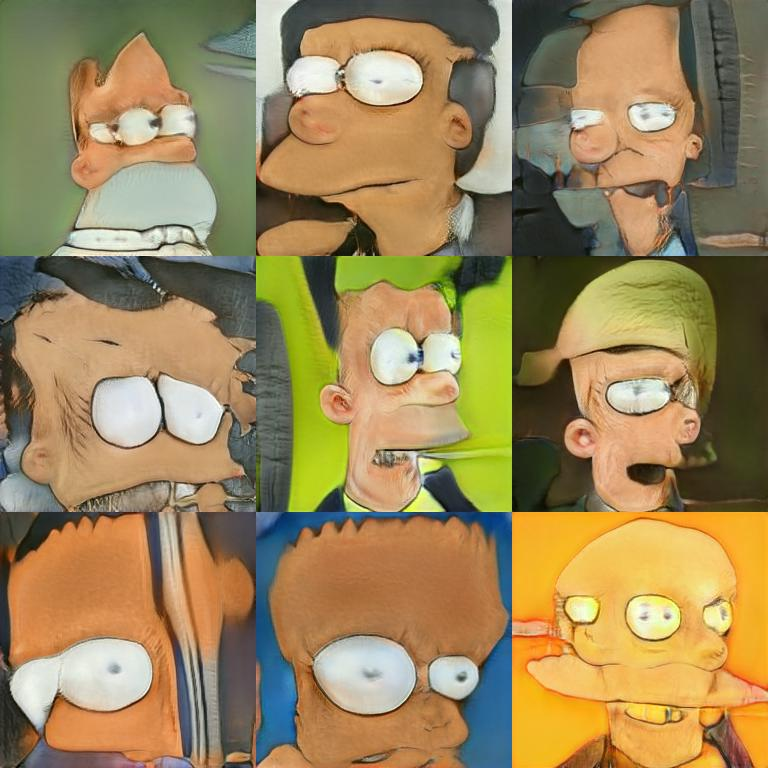

blending network-snapshot-000078 at 128x128


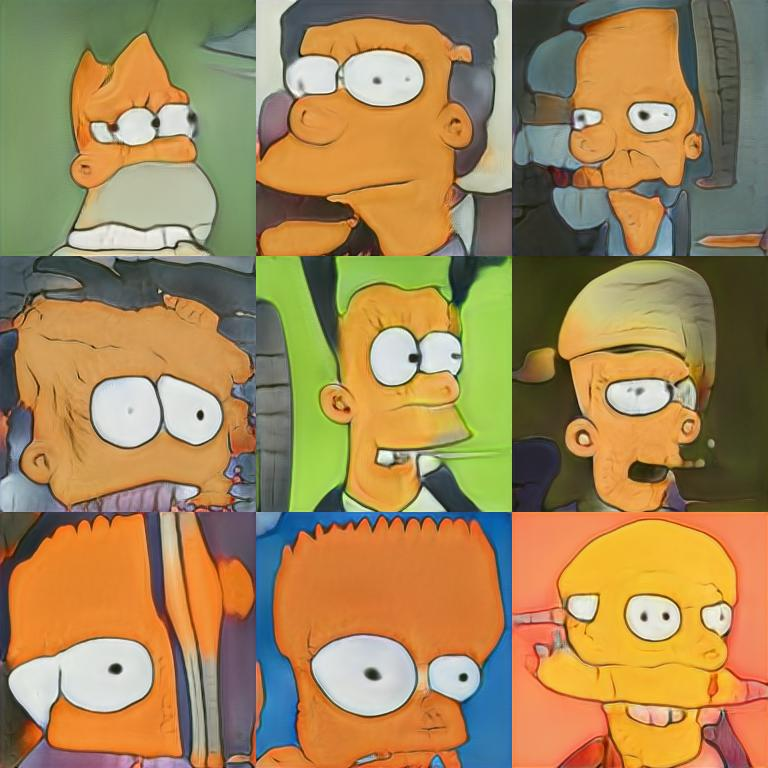

blending network-snapshot-000078 at 256x256


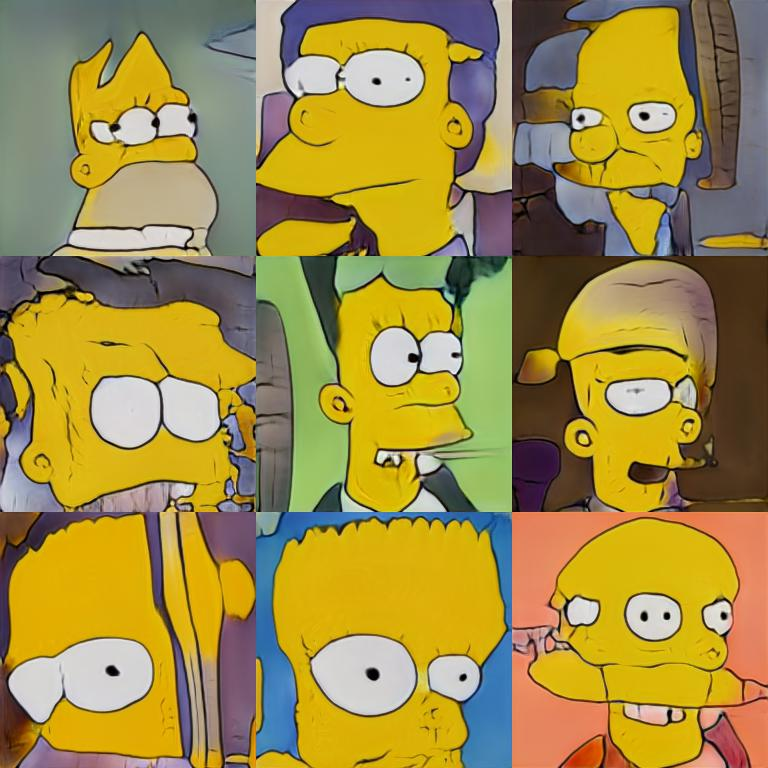

blending network-snapshot-000082 at 64x64


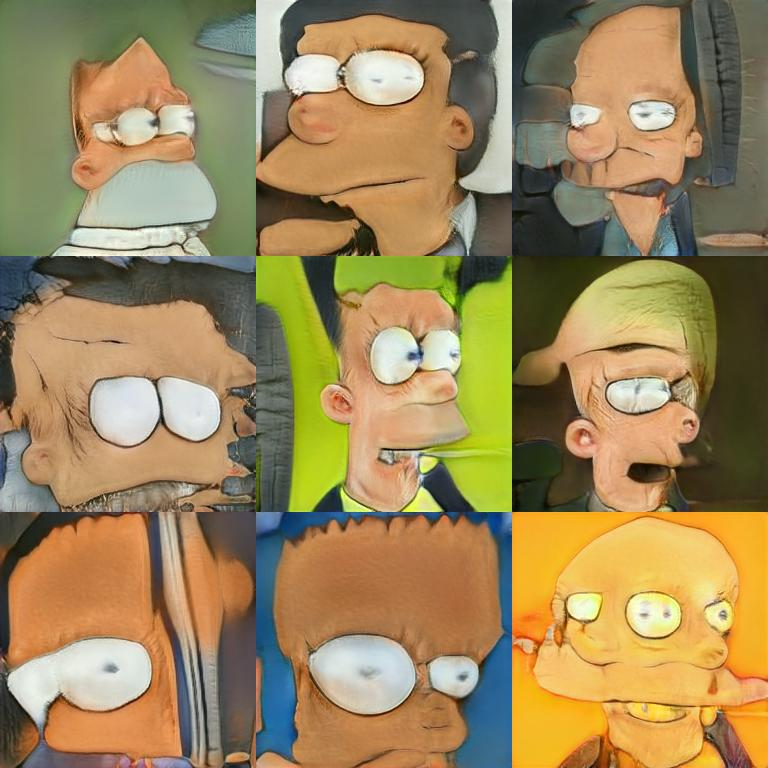

blending network-snapshot-000082 at 128x128


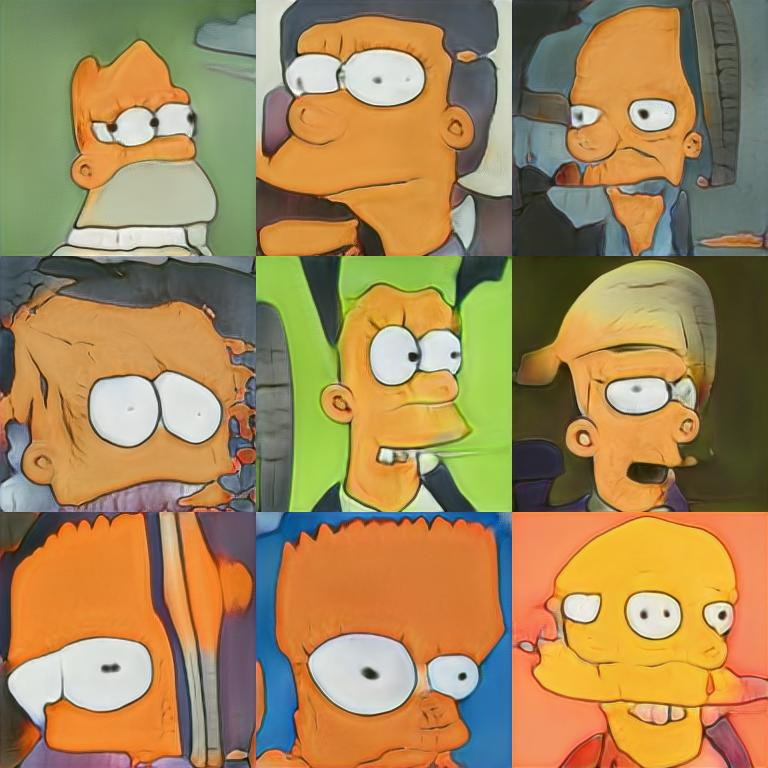

blending network-snapshot-000082 at 256x256


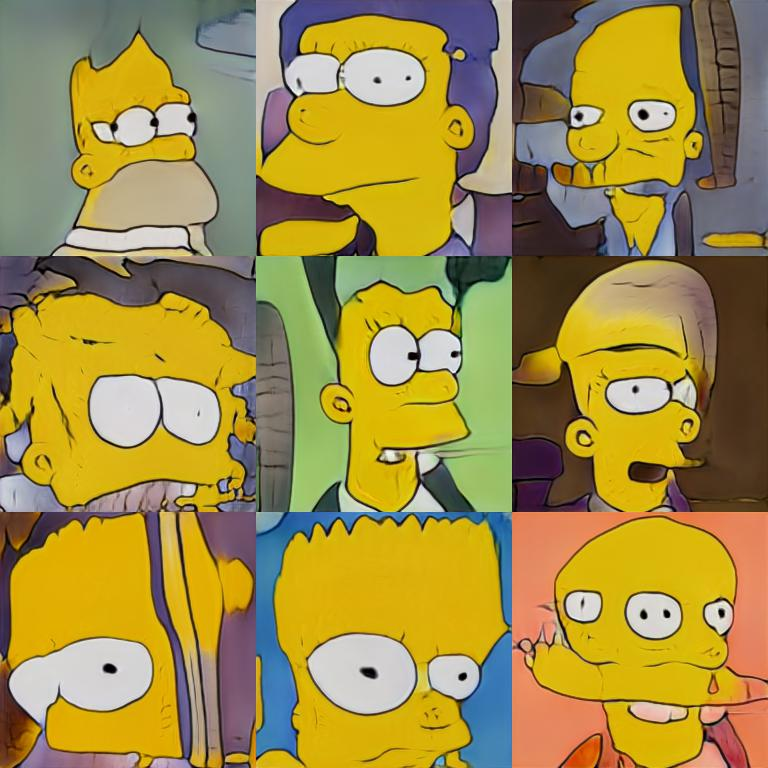

blending network-snapshot-000086 at 64x64


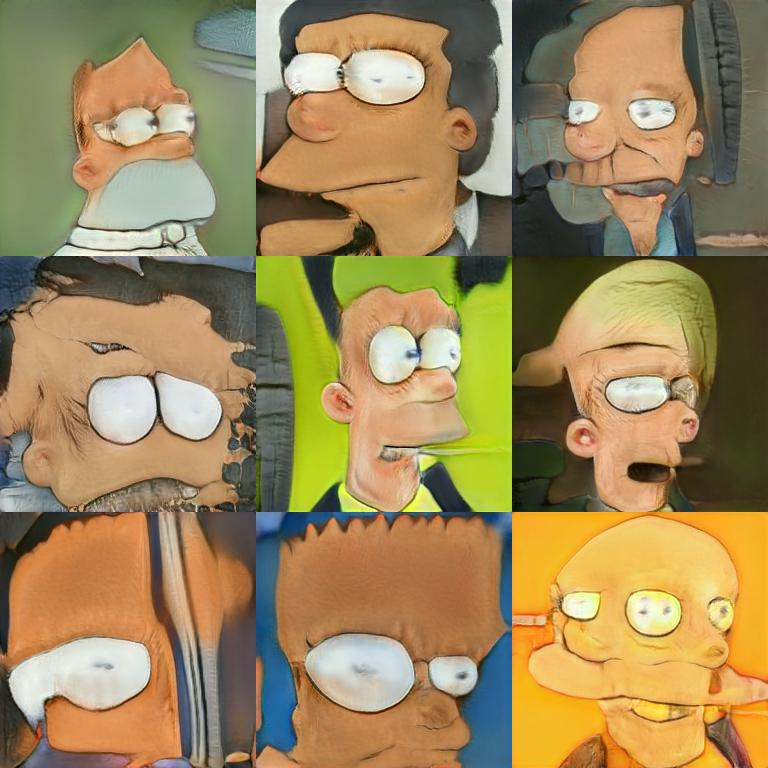

blending network-snapshot-000086 at 128x128


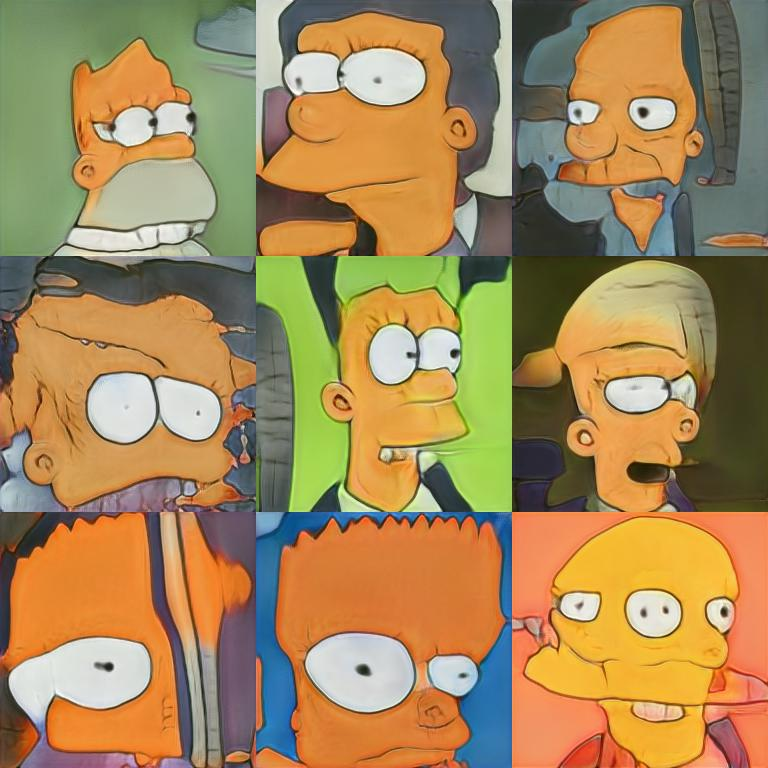

blending network-snapshot-000086 at 256x256


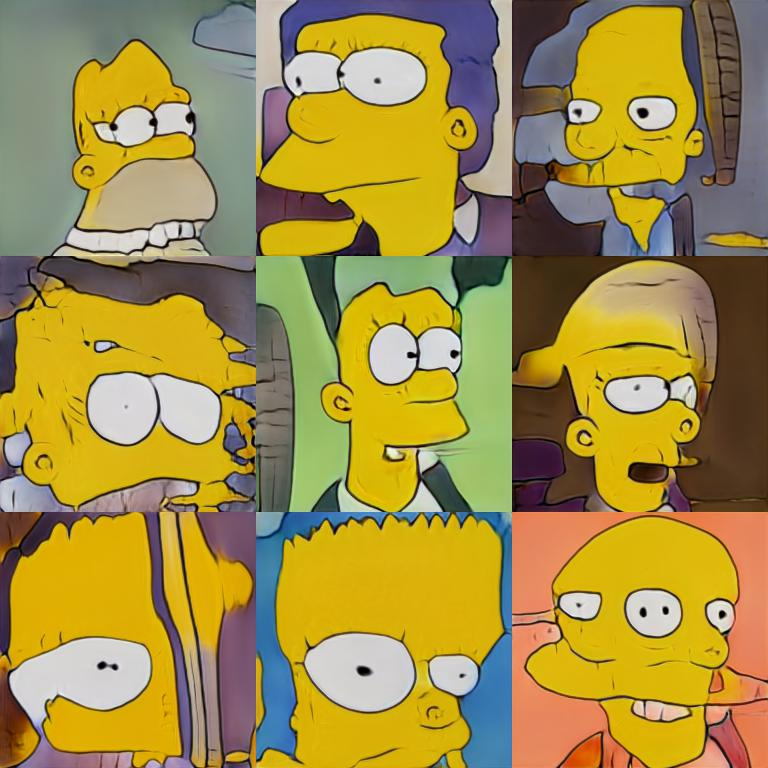

blending network-snapshot-000090 at 64x64


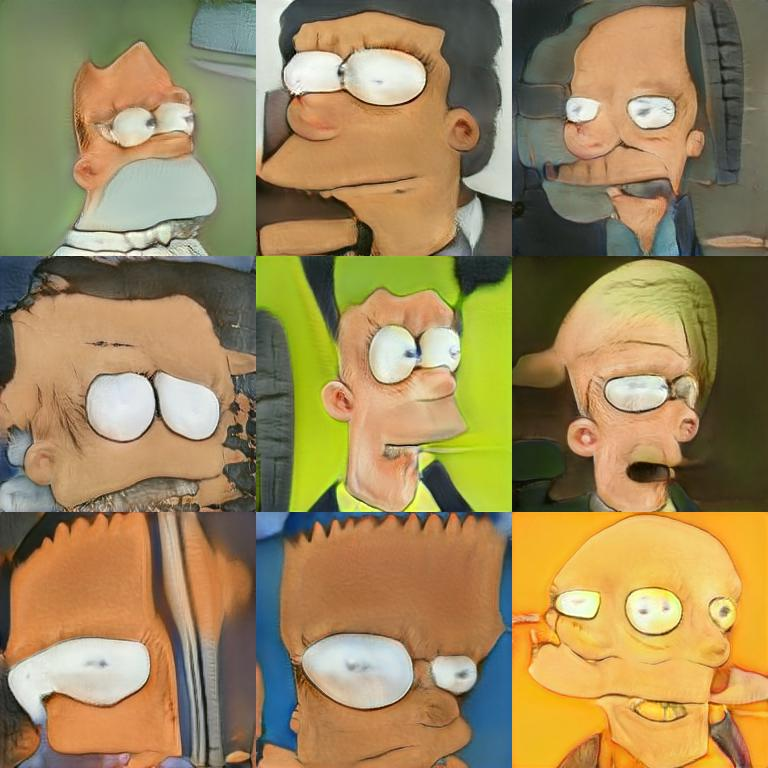

blending network-snapshot-000090 at 128x128


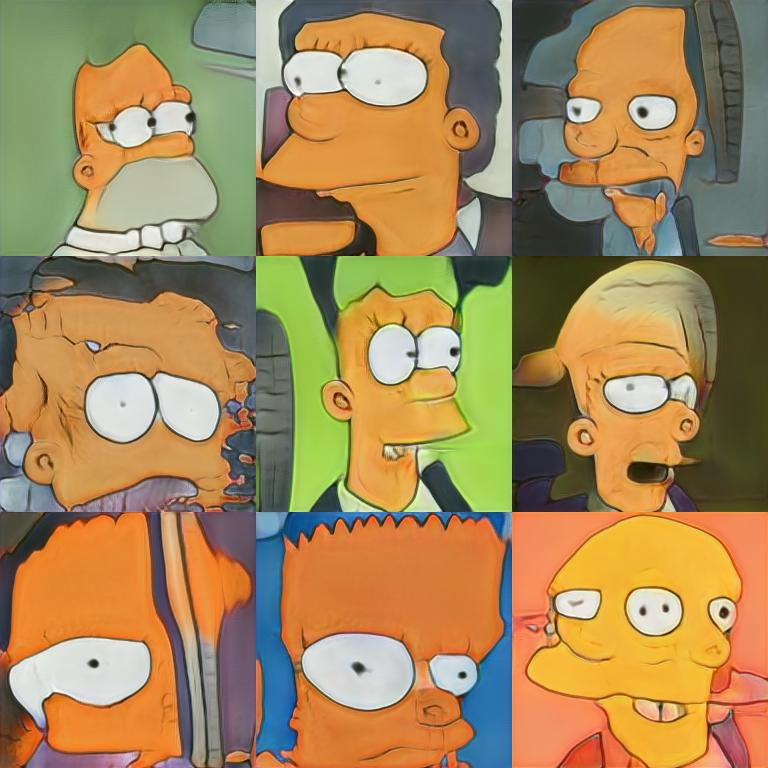

blending network-snapshot-000090 at 256x256


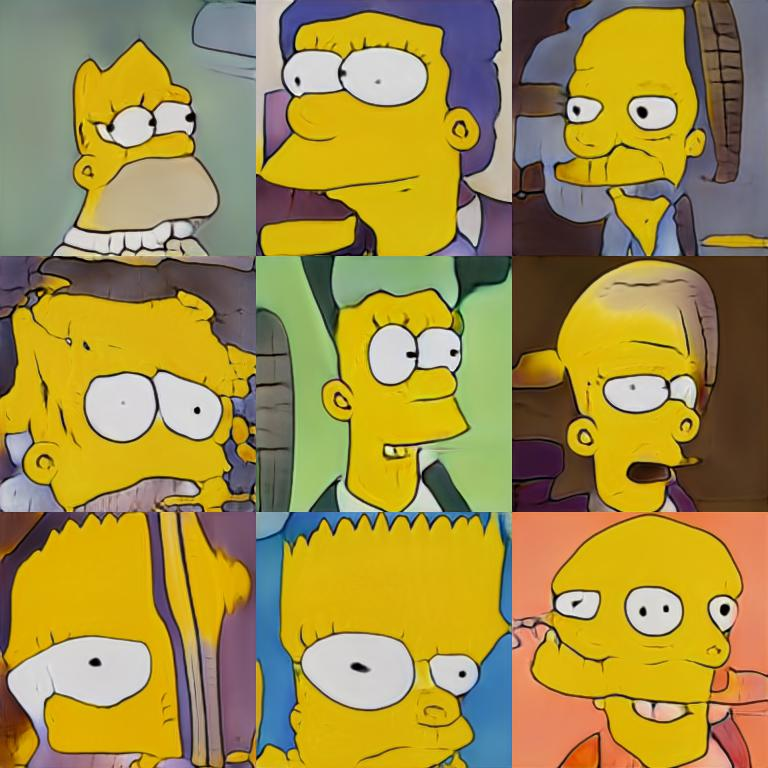

In [ ]:
import blend_models

resolutions = (64, 128, 256)
#resolutions = (16, 32, 64)
for model in SNAPSHOTS[5:]:
  for res in resolutions:
    filename = f"/content/drive/My Drive/colab_data/blend/other-ffhq-blended-{Path(model).stem}-{res}.jpg"
    blend_models.main(model, "ffhq.pkl", res, output_grid=filename)
    img = Image(filename=filename)
    print(f"blending {Path(model).stem} at {res}x{res}")
    display(img)

In [ ]:
resolutions = (64, 128, 256)
for model in SNAPSHOTS:
  for res in resolutions:
    filename = f"/content/drive/My Drive/colab_data/blend/ffhq-other-blended-{Path(model).stem}-{res}.jpg"
    blend_models.main("ffhq.pkl", model, res, output_grid=filename)
    img = Image(filename=filename)
    print(f"blending {Path(model).stem} at {res}x{res}")
    display(img)

In [ ]:

%cd /content/stylegan2-ada/
#Here you choose the layer for the swapping in which your fine-tuned PKL is on the "Low res" side
!python blend_models.py $SNAPSHOTS[-1] ffhq.pkl 64 --output-pkl="other-ffhq-blended-64.pkl"
#Here you choose the layer for the swapping in which the FFHQ PKL is on the "Low res" side
!python blend_models.py ffhq.pkl $SNAPSHOTS[-1] 8 --output-pkl="ffhq-other-blended-8.pkl"



In [ ]:
#Save a copy of your blended PKLs in your drive
!cp "other-ffhq-blended-64.pkl" "/content/drive/My Drive/colab_data/blend/MetFaces-FFHQ-blended-64.pkl"
!cp "ffhq-other-blended-8.pkl"  "/content/drive/My Drive/colab_data/blend/FFHQ-MetFaces-blended-8.pkl"

In [ ]:
#Make interpolation animations

In [ ]:
%cd /content/stylegan2-ada/
import blend_models
!python grid_vid.py ffhq-other-blended-8.pkl
!mv "output.mp4" "/content/drive/My Drive/colab_data/blend/FFHQ-MetFaces-blended-8.mp4"

In [ ]:
#%cd /content/stylegan2/
%cd /content/stylegan2-ada/
import blend_models
!python grid_vid.py "other-ffhq-blended-64.pkl"
!mv "output.mp4" "/content/drive/My Drive/colab_data/blend/MetFaces-FFHQ-blended-64.mp4"

In [ ]:
#%cd /content/stylegan2/
%cd /content/stylegan2-ada/
import blend_models
!python grid_vid.py $SNAPSHOTS[-1]
!mv "output.mp4" "/content/drive/My Drive/colab_data/blend/MetFaces.mp4"

In [ ]:
#%cd /content/stylegan2/
%cd /content/stylegan2-ada/
import blend_models
!python grid_vid.py ffhq.pkl
!mv "output.mp4" "/content/drive/My Drive/colab_data/blend/FFHQ.mp4"